# Breast cancer classifier

Start by importing the appropriate libraries. Seaborn for visualisation and the breast cancer dataset from the scikit

In [1]:
import seaborn as sns
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer()

Let's first have a look at the data.

In [3]:
print(breast_cancer_data.data[0])
print(breast_cancer_data.feature_names)

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


What are we actually trying to classify?

In [4]:
print(breast_cancer_data.target)
print(breast_cancer_data.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

Now that we have the data - the next thing to do is to split it up in training and validation sets. For that import train_test_split from sklearn.

test_train_split(data_to_split, data_labels, test_size, random_state)

Random_state ensures the data is split in the same way every time one runs the code

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
training_data, validation_data, training_labels, validation_labels = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size = 0.2, random_state = 100)

Quick confirmation that the splitting worked - both should be the same length

In [7]:
print(len(training_data))
print(len(training_labels))

455
455


Next step is to create our classifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier

Once the import done, let's find out the best k value for our classifier

In [28]:
accuracies = []
for k in range(1, 100):
    classifier = KNeighborsClassifier(k)
    classifier.fit(training_data, training_labels)
    accuracies.append(classifier.score(validation_data, validation_labels))
print(accuracies)

[0.9298245614035088, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684

Plotting the scores will help us find out the best k value

In [27]:
import matplotlib.pyplot as plt

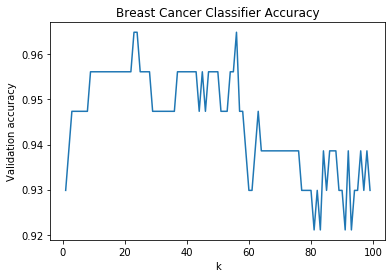

In [31]:
k_list = range(1, 100)
plt.plot(k_list, accuracies)
plt.xlabel('k')
plt.ylabel('Validation accuracy')
plt.title('Breast Cancer Classifier Accuracy')
plt.show()
